In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./images/zly1.jpg')

In [3]:
# 去掉饱和度
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

(-0.5, 639.5, 1137.5, -0.5)

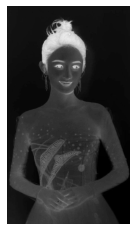

In [4]:
# 反相
img_inv = 255.0 - img_gray

#显示图片
plt.imshow(img_inv/255.0,cmap='gray')
plt.axis('off')

In [5]:
# 高斯模糊
# img_filt = cv2.GaussianBlur(img_inv, ksize=(3, 3),sigmaX=0, sigmaY=0)
# 最小值滤镜
img_filt = np.zeros_like(img_inv,dtype=np.uint8)
radius = 3;
for i in range(radius,img_inv.shape[0]-radius):
    for j in range(radius,img_inv.shape[1]-radius):
            img_filt[i,j] = np.min(img_inv[i-radius:i+radius,j-radius:j+radius])

In [6]:
# color dodge
A = img_gray.astype('float32')
B = img_filt.astype('float32')
img_dodge = A+(A*B)/(255.0-B)

(-0.5, 639.5, 1137.5, -0.5)

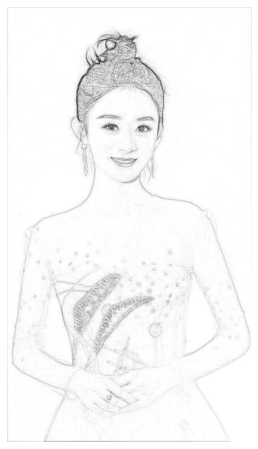

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(img_dodge/255.0,cmap='gray')
plt.axis('off')

In [8]:
plt.imsave('result.jpg',img_dodge/255.0,cmap='gray')